In [1]:
# import data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [2]:
# read data
data = pd.read_csv("CA.csv")
print(data)

    Unnamed: 0    Year    HYTCP    WYTCP   SOEGP    NUETP           GDP  \
0            0  1960.0  17445.0      0.0     0.0      0.0  5.143560e+04   
1            1  1961.0  15368.0      5.0     0.0      0.0  5.689940e+04   
2            2  1962.0  22835.0      7.0     0.0      0.0  6.236320e+04   
3            3  1963.0  25334.0    193.0     0.0      0.0  6.780900e+04   
4            4  1964.0  22098.0    367.0     0.0      0.0  7.351300e+04   
5            5  1965.0  30523.0    270.0     0.0      0.0  7.825300e+04   
6            6  1966.0  26236.0    163.0     0.0      0.0  8.462700e+04   
7            7  1967.0  35277.0    563.0     0.0      0.0  8.957100e+04   
8            8  1968.0  27175.0   1505.0     0.0      0.0  9.872100e+04   
9            9  1969.0  40418.0   2458.0     0.0      0.0  1.066290e+05   
10          10  1970.0  38082.0   3132.0     0.0      0.0  1.119850e+05   
11          11  1971.0  39018.0   3519.0     0.0      0.0  1.203720e+05   
12          12  1972.0  3

In [14]:
# Linear regression on 10 other factors
# let other 10 features be predictors X, solar be Y
all_x = data[['GDP','CLPRB','EMFDB','ENPRP','NGMPB','PAPRB','PCP','ZNDX','Nominal Price', 'Inflation Adjusted Price']][0:55]
all_y = data[['SOEGP']][0:55]
# split data for train and test
train_x, test_x, train_y, test_y = train_test_split(all_x, all_y, test_size=0.2)
#print(test_x)

              0   SOEGP
0    861.611976     NaN
1    -84.387831     NaN
2   -307.180022     NaN
3   -251.162100     NaN
4    502.787305     NaN
5    324.854361     NaN
6    460.380360     NaN
7   1984.437324     NaN
8    211.399880     NaN
9    866.830526     NaN
10  -118.253938     0.0
18          NaN     0.0
24          NaN     5.0
25          NaN    11.0
34          NaN   486.0
35          NaN   497.0
36          NaN   521.0
38          NaN   502.0
44          NaN   571.0
49          NaN   647.0
54          NaN  9834.0


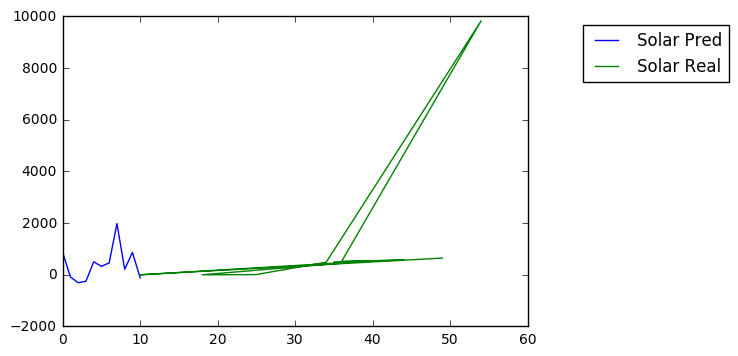

In [29]:
# Use normal linear regression do train and test
regr = linear_model.LinearRegression()
regr.fit(train_x, train_y)

res_df = pd.DataFrame(regr.predict(test_x))
result = pd.concat([res_df, test_y], axis = 1, join_axes=None, ignore_index=False,
          keys=None, levels=None, names=None, verify_integrity=False,
          copy=True)
print(result)

plt.plot(res_df)
plt.plot(test_y)
plt.legend(['Solar Pred', 'Solar Real'], bbox_to_anchor=(1.45, 1))
plt.show()